In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset
df = pd.read_csv('dataset/stack_overflow_2025_cleaned_eda.csv')
df.head()

,ResponseId,Age,Country,EdLevel,Employment,WorkExp,YearsCode,OrgSize,Industry,MainBranch,DevType,ICorPM,RemoteWork,LearnCode,LearnCodeChoose,LearnCodeAI,AIThreat,AISelect,AISent,AIOpen,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,DevEnvsHaveWorkedWith,ConvertedCompYearly,JobSat
0,1,25-34 years old,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,14.0,20 to 99 employees,Fintech,I am a developer by profession,"Developer, mobile",People manager,Remote,Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",I'm not sure,"Yes, I use AI tools monthly or infrequently",Indifferent,"Troubleshooting, profiling, debugging",Bash/Shell (all shells);Dart;SQL,Dart,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,Unknown,Android Studio;Notepad++;Visual Studio;Visual ...,61256.0,10.0
1,2,25-34 years old,Netherlands,"Associate degree (A.A., A.S., etc.)",Employed,2.0,10.0,500 to 999 employees,Retail and Consumer Services,I am a developer by profession,"Developer, back-end",Individual contributor,"Hybrid (some in-person, leans heavy to flexibi...",Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",I'm not sure,"Yes, I use AI tools weekly",Indifferent,All skills. AI is a flop.,Java,Java;Python;Swift,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,IntelliJ IDEA;PyCharm;Visual Studio Code;Xcode,104413.0,9.0
2,3,35-44 years old,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",10.0,12.0,Unknown,Software Development,I am a developer by profession,"Developer, front-end",Unknown,Unknown,Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools daily",Favorable,"Understand how things actually work, problem s...",Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,Visual Studio Code,53061.0,8.0
3,4,35-44 years old,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,4.0,5.0,"10,000 or more employees",Retail and Consumer Services,I am a developer by profession,"Developer, back-end",Individual contributor,Remote,"Other online resources (e.g. standard search, ...","Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools weekly",Favorable,Unknown,Java;Kotlin;SQL,Java;Kotlin,Unknown,Amazon Web Services (AWS);Google Cloud,Spring Boot,Unknown,36197.0,6.0
4,5,35-44 years old,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",21.0,22.0,Unknown,Software Development,I am a developer by profession,Engineering manager,Unknown,Unknown,Unknown,"No, I am not new to coding and did not learn n...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools weekly",Favorable,"critical thinking, the skill to define the tas...",C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,C#;Java;JavaScript;Python;SQL;TypeScript,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Eclipse;IntelliJ IDEA;Jupyter Notebook/Jupyter...,60000.0,7.0


## 1. Experience vs Salary (Reality Check)

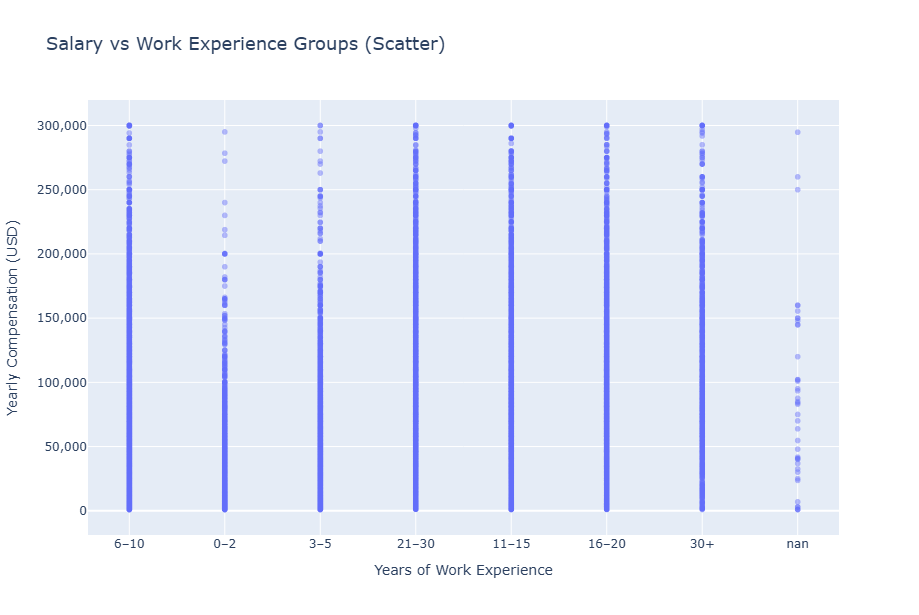

In [7]:
import plotly.express as px
import numpy as np

# Filter salary range
salary_exp = df[df['ConvertedCompYearly'].between(1000, 300000)].copy()

# Create experience groups
salary_exp['WorkExpGroup'] = pd.cut(
    salary_exp['WorkExp'],
    bins=[0, 2, 5, 10, 15, 20, 30, 50],
    labels=['0–2', '3–5', '6–10', '11–15', '16–20', '21–30', '30+']
)

# Add jitter so points don't overlap vertically
salary_exp['jitter'] = np.random.uniform(-0.3, 0.3, len(salary_exp))

fig = px.scatter(
    salary_exp,
    x=salary_exp['WorkExpGroup'].astype(str),
    y='ConvertedCompYearly',
    opacity=0.45,
    title='Salary vs Work Experience Groups (Scatter)',
    labels={
        'x': 'Years of Work Experience',
        'ConvertedCompYearly': 'Yearly Compensation (USD)'
    }
)

fig.update_layout(
    width=1000,
    height=600,
    yaxis_tickformat=',',
    title_font_size=18
)

fig.show()


## Developer Role vs Salary (Who Gets Paid More?)

In [3]:
df_dev_salary = df[['DevType', 'ConvertedCompYearly']].dropna()
df_dev_salary = df_dev_salary[df_dev_salary['ConvertedCompYearly'] <= 300000]

df_dev_salary = df_dev_salary.assign(
    DevType=df_dev_salary['DevType'].str.split(',')
).explode('DevType')

df_dev_salary['DevType'] = df_dev_salary['DevType'].str.strip()


In [9]:
top_roles = (
    df_dev_salary
    .groupby('DevType')['ConvertedCompYearly']
    .median()
    .sort_values(ascending=False)
    
)

top_roles


DevType
Engineering manager                       120381.0
VP                                        117657.0
Senior executive (C-suite                 117657.0
etc.)                                     117657.0
software or solutions                      98612.0
Architect                                  98612.0
Product manager                            97604.0
Cloud infrastructure engineer              96865.5
Applied scientist                          96377.0
Cybersecurity or InfoSec professional      96292.0
DevOps engineer or professional            85851.0
technology or otherwise                    83767.0
Founder                                    83767.0
AI/ML engineer                             81685.0
Database administrator or engineer         81210.0
Data scientist                             80519.0
Data engineer                              79001.0
embedded applications or devices           77730.0
back-end                                   75410.0
desktop or enterprise a

## Country vs Salary (Economic Reality)

In [13]:
country_salary = (
    df[df['ConvertedCompYearly'].between(1000, 300000)]
    .groupby('Country')['ConvertedCompYearly']
    .median()
    .sort_values(ascending=False)
    .head(30)
)

country_salary


Country
United States of America                                145000.0
Nomadic                                                 144609.0
Israel                                                  141188.0
Switzerland                                             136392.0
Mauritania                                              121570.0
Iceland                                                 118454.0
Ireland                                                 116015.0
Belize                                                  102121.0
Luxembourg                                              101512.5
Denmark                                                  98600.0
Australia                                                97514.0
Jamaica                                                  96796.5
Cyprus                                                   92812.0
United Kingdom of Great Britain and Northern Ireland     92664.5
Norway                                                   88945.0
Canada           

## AI Usage vs Job Satisfaction

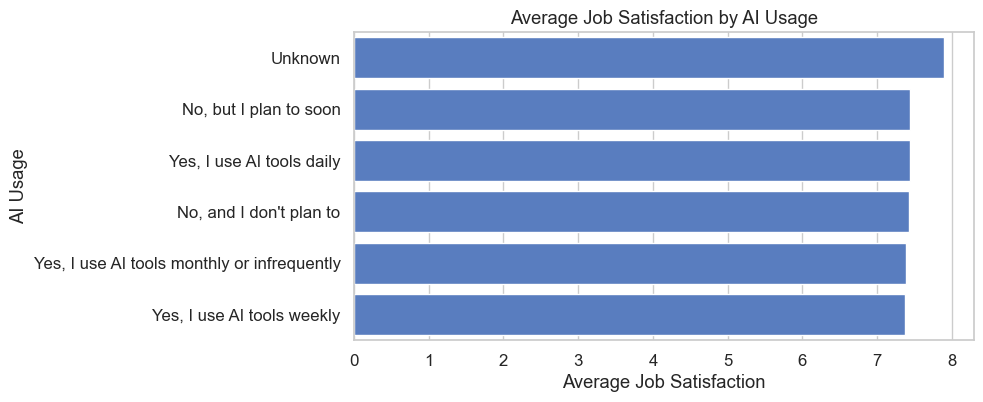

In [3]:
ai_usage_mean = (
    df[['AISelect', 'JobSat']]
    .dropna()
    .groupby('AISelect')['JobSat']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
sns.barplot(
    x=ai_usage_mean.values,
    y=ai_usage_mean.index,
    orient='h'
)
plt.title('Average Job Satisfaction by AI Usage')
plt.xlabel('Average Job Satisfaction')
plt.ylabel('AI Usage')
plt.show()


## AI Threat Perception vs Satisfaction

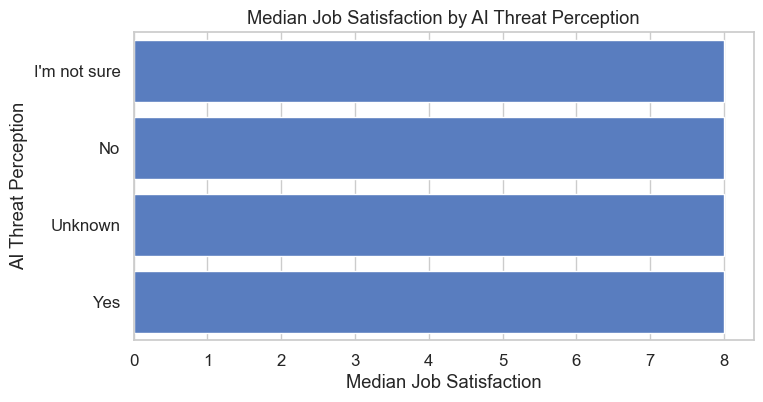

In [4]:
ai_threat_median = (
    df[['AIThreat', 'JobSat']]
    .dropna()
    .groupby('AIThreat')['JobSat']
    .median()
    .sort_values()
)

plt.figure(figsize=(8,4))
sns.barplot(
    x=ai_threat_median.values,
    y=ai_threat_median.index,
    orient='h'
)
plt.title('Median Job Satisfaction by AI Threat Perception')
plt.xlabel('Median Job Satisfaction')
plt.ylabel('AI Threat Perception')
plt.show()


## Learning Behavior vs Career Growth

In [5]:
learn_salary = df[['LearnCode', 'ConvertedCompYearly']].dropna()
learn_salary = learn_salary[learn_salary['ConvertedCompYearly'] <= 300000]

# Split multi-select column
learn_exploded = (
    learn_salary
    .assign(LearnCode=learn_salary['LearnCode'].str.split(';'))
    .explode('LearnCode')
)

# Clean whitespace
learn_exploded['LearnCode'] = learn_exploded['LearnCode'].str.strip()

learn_exploded.head()


,LearnCode,ConvertedCompYearly
0,Online Courses or Certification (includes all ...,61256.0
0,"Other online resources (e.g. standard search, ...",61256.0
1,Online Courses or Certification (includes all ...,104413.0
1,"Other online resources (e.g. standard search, ...",104413.0
1,Books / Physical media,104413.0


In [13]:
learn_stats = (
    learn_exploded
    .groupby('LearnCode')['ConvertedCompYearly']
    .agg(
        count='count',
        median='median',
        mean='mean'
    )
    .sort_values('median')
)

learn_stats=learn_stats[:-1]
learn_stats

,count,median,mean
LearnCode,,,
Coding Bootcamp,607,25071.0,43241.658979
"School (i.e., University, College, etc)",1957,30000.0,46808.785897
Online Courses or Certification (includes all media types),5407,58120.0,69248.824857
Videos (not associated with specific online course or certification),8418,63808.0,75117.786885
Games or coding challenges,1955,69609.0,80296.146292
Other (please specify):,500,69609.0,81941.680000
Stack Overflow or Stack Exchange,8914,69609.0,80142.534104
AI CodeGen tools or AI-enabled apps,7640,69643.0,81772.908770
"Other online resources (e.g. standard search, forum, online community)",10173,70040.0,82155.681608


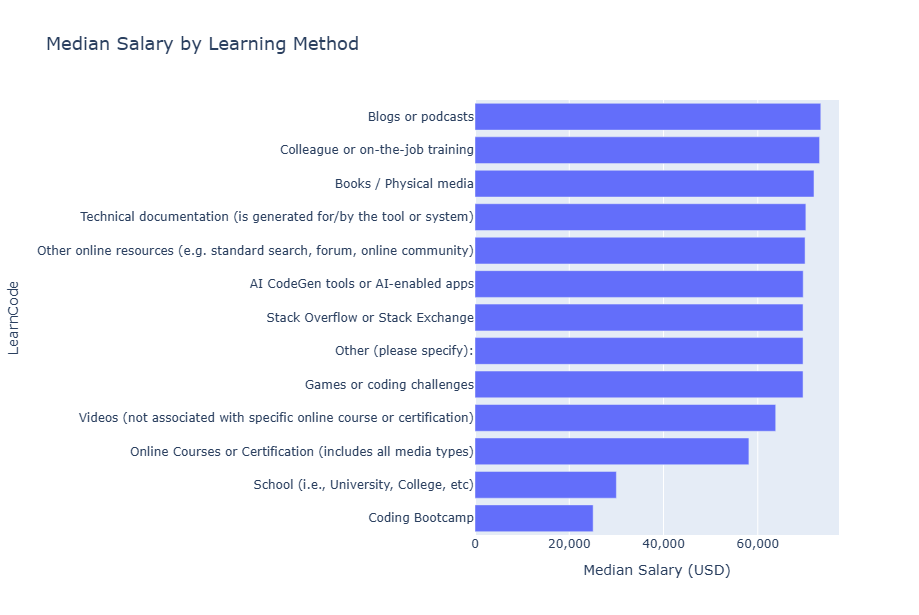

In [12]:
import plotly.express as px

fig = px.bar(
    learn_stats,
    x='median',
    y=learn_stats.index,
    orientation='h',
    title='Median Salary by Learning Method',
    labels={
        'median': 'Median Salary (USD)',
        'y': 'Learning Method'
    }
)

fig.update_layout(
    width=1100,
    height=600,
    xaxis_tickformat=',',
    title_font_size=18
)

fig.show()
